# Gillian Seed: DenseNet Model Results
## (as seen in my presentation)

In this file, I displayed all of my evaluation metrics that I presented in class.

In [349]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
import torchvision
from keras import backend as K
import seaborn as sb

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from keras import metrics


In [5]:
# load the training and test sets and create all 4 classes
print(os.getcwd())
# get stuff in BrainTumorData
# which has Testing and Training
labels = []

C:\Users\gmsee\CompHealthProject


In [6]:
data_directory = str(os.getcwd()) + '\BrainTumorData'
#data_directory = str(os.getcwd()) + '/Brain-Tumor-Classification-DataSet-master'

# display contents of data directory
print(os.listdir(data_directory))

class_labels = []

for item in os.listdir(data_directory):
    print(item)
    class_labels = os.listdir(data_directory + '\\' + item)
    #class_labels = os.listdir(data_directory + '/' + item)

print(class_labels)

# before taking out validation set
#X_train_full
#y_train_full

['Testing', 'Training']
Testing
Training
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [129]:
# ******************************************
# *** edited by Gillian on Jupyter notebook
# ******************************************
X_test = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Testing',
                                                        labels='inferred',
                                                        label_mode='categorical', 
                                                        class_names=class_labels, 
                                                        #color_mode='grayscale',
                                                        batch_size=32,
                                                        image_size=(250, 250), #shuffle=False, 
                                                        seed=1337)

Found 394 files belonging to 4 classes.


In [144]:
set_ = X_test

In [149]:
# view X_test
y_test = []
label_indices = []
for images, labels in set_:
    for i in range(len(labels)):
        label_index = list(np.asarray(labels[i])).index(1)
        label_indices.append(label_index)
        y_test.append(list(np.asarray(labels[i])))
print(len(y_test))
y_test

394


[[1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0,

In [9]:
X_train = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Training',
                                                        labels='inferred',
                                                        validation_split=0.12,
                                                        label_mode='categorical', 
                                                        subset="training",
                                                        seed=123,
                                                        class_names=class_labels, 
                                                        batch_size=32,
                                                        image_size=(250, 250), shuffle=True)

X_valid = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'/Training',
                                                        labels='inferred',
                                                        validation_split=0.12,
                                                        label_mode='categorical', 
                                                        subset="validation",
                                                        seed=123,
                                                        class_names=class_labels, 
                                                        batch_size=32,
                                                        image_size=(250, 250), shuffle=True)



Found 2870 files belonging to 4 classes.
Using 2526 files for training.
Found 2870 files belonging to 4 classes.
Using 344 files for validation.


In [10]:
curr_dir = data_directory + '/Testing/'
#data_dict = {label:[os.listdir(curr_dir + label)] for label in class_labels}
dict = {}
for label in class_labels:
    dict = {label:file for file in os.listdir(curr_dir + label)}
    #for file in os.listdir(curr_dir + label):
        #print(file)
    print(dict)
#df = pd.DataFrame(data_dict)
#df

{'glioma_tumor': 'image.jpg'}
{'meningioma_tumor': 'image.jpg'}
{'no_tumor': 'image.jpg'}
{'pituitary_tumor': 'image.jpg'}


In [289]:
#  use data augmentation layers to widen dataset
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(fill_mode = 'nearest', height_factor=(-0.1, -0.2)),
    tf.keras.layers.RandomContrast(factor=0.2)
])


# use pretrained DenseNet - (pretrained on iamgenet dataset)
DenseNet = tf.keras.applications.DenseNet201(input_shape=(250,250,3),include_top=False,weights='imagenet',pooling='avg')
DenseNet.trainable = False

# apply augmentation to model
# edit last layers for our number of classes: 4
finalModel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
    data_augmentation,
    DenseNet,
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(4, activation='softmax')
])


finalModel.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

history=finalModel.fit(X_train,validation_data=X_valid,epochs=50)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Epoch 1/50
79/79 [==============================] - 52s 502ms/step - loss: 1.0675 - accuracy: 0.6041 - val_loss: 0.7000 - val_accuracy: 0.7064
Epoch 2/50
79/79 [==============================] - 37s 459ms/step - loss: 0.5949 - accuracy: 0.7660 - val_loss: 0.5894 - val_accuracy: 0.7616
Epoch 3/50
79/79 [==============================] - 37s 456ms/step - loss: 0.5215 - accuracy: 0.7902 - val_loss: 0.5327 - val_accuracy: 0.7791
Epoch 4/50
79/79 [==============================] - 36s 455ms/step - loss: 0.4753 - accuracy: 0.8163 - val_loss: 0.5320 - val_accuracy: 0.7878
Epoch 5/50
79/79 [==============================] - 36s 455ms/step - loss: 0.3678 - accuracy: 0.8591 - val_loss: 0.6008 - val_accuracy: 0.7733
Epoch 6/50
79/79 [==============================] - 36s 456ms/step - loss: 0.3455 - accuracy: 0.8690 - val_loss: 0.4511 - val_accuracy: 0.8430
Epoch 7/50
79/79 [==============================] - 37s 457ms/step - loss: 0.2994 - accuracy: 0.8931 - val_loss: 0.4254 - val_accuracy: 0.8256

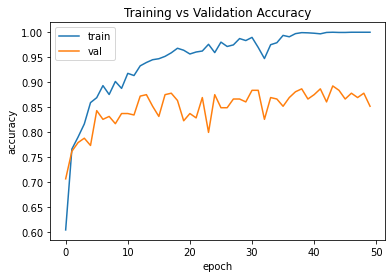

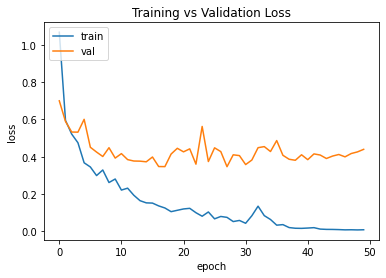

In [ ]:
# example without data augmentation to compare - I will probably talk about the usefulness of data augmentation with 
# a smaller dataset to achieve good results

DenseNet2 = tf.keras.applications.DenseNet201(input_shape=(250,250,3),include_top=False,weights='imagenet',pooling='avg')
DenseNet2.trainable = False


finalModel2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(250, 250, 3)),
    DenseNet2,
    tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(4, activation='softmax')
])

finalModel2.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

history2=finalModel2.fit(X_train,validation_data=X_valid,epochs=50)

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# loadedModel = keras.models.load_model('/myModelDenseNet')
# evaluate model

In [ ]:
precision =finalModel2.compile(optimizer='sgd',
              loss='mse',
              metrics=[tf.keras.metrics.Precision()])

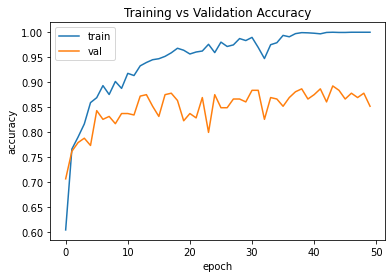

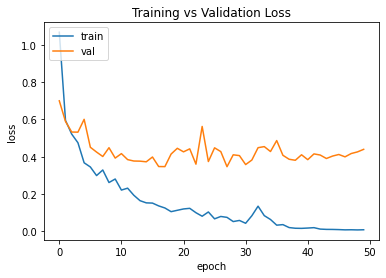

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
find_folder = str(os.getcwd())
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'BrainTumorData',
 'DenseNet.ipynb',
 'myModelDenseNet',
 'start_code-Copy2.ipynb',
 'start_code.ipynb',
 'start_code_BWcopy.ipynb',
 'start_code_example.ipynb',
 'start_code_RGBcopy.ipynb']

In [32]:
model_dir = find_folder + '/myModelDenseNet'
os.listdir(model_dir)

['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']

In [37]:
aug_model = tf.keras.models.load_model(model_dir)
aug_model

In [151]:
# # *************************
# # added by me, add to colab
# # *************************
# y_pred1 = aug_model.predict(X_test)
# len(y_pred1)

394

In [152]:
# each input outputs 4 values
# *************************
# added by me, add to colab
# *************************
y_pred1 = aug_model.predict(X_test)
# len(y_pred1) = 394
y_pred1

array([[7.8435036e-08, 9.9994195e-01, 5.1590345e-05, 6.4882834e-06],
       [9.2123628e-01, 7.7880330e-02, 3.1589101e-05, 8.5178035e-04],
       [1.2191865e-06, 5.3253098e-06, 1.1045000e-06, 9.9999237e-01],
       ...,
       [9.9530470e-01, 4.5661023e-03, 5.2855157e-06, 1.2384498e-04],
       [3.9094556e-04, 9.9215889e-01, 7.4502202e-03, 9.3434960e-10],
       [1.1790071e-05, 9.9989164e-01, 9.6615207e-05, 7.9815061e-09]],
      dtype=float32)

In [174]:
# had issues directly using the loaded dataset, it kept changing outputs
y_pred1_check = aug_model.predict(set_)
y_pred1_check

array([[4.4423614e-05, 2.5087595e-05, 9.9993002e-01, 4.3835564e-07],
       [5.6867750e-04, 3.7048513e-03, 9.9572611e-01, 4.1733048e-07],
       [6.0808088e-11, 9.9384540e-04, 9.9896872e-01, 3.7386802e-05],
       ...,
       [9.9862039e-01, 1.3731940e-03, 6.3209977e-06, 1.4262081e-07],
       [1.3064767e-03, 7.4297898e-02, 9.1313082e-01, 1.1264794e-02],
       [9.9978727e-01, 2.1237091e-04, 3.5833693e-07, 1.1741898e-08]],
      dtype=float32)

In [153]:
y_pred1

array([[7.8435036e-08, 9.9994195e-01, 5.1590345e-05, 6.4882834e-06],
       [9.2123628e-01, 7.7880330e-02, 3.1589101e-05, 8.5178035e-04],
       [1.2191865e-06, 5.3253098e-06, 1.1045000e-06, 9.9999237e-01],
       ...,
       [9.9530470e-01, 4.5661023e-03, 5.2855157e-06, 1.2384498e-04],
       [3.9094556e-04, 9.9215889e-01, 7.4502202e-03, 9.3434960e-10],
       [1.1790071e-05, 9.9989164e-01, 9.6615207e-05, 7.9815061e-09]],
      dtype=float32)

In [154]:
#max?
# let's say probability > 0.5 is yes
new_ypred1 = []
for item in y_pred1:
    newitem = (item > 0.5)
    print(newitem)
    new_ypred1.append(newitem)
print(new_ypred1)

[False  True False False]
[ True False False False]
[False False False  True]
[ True False False False]
[False False  True False]
[False False  True False]
[False False False  True]
[ True False False False]
[False False  True False]
[False  True False False]
[False False  True False]
[False  True False False]
[False  True False False]
[ True False False False]
[False False  True False]
[ True False False False]
[False  True False False]
[False  True False False]
[ True False False False]
[False  True False False]
[ True False False False]
[ True False False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False False  True False]
[False False  True False]
[False False  True False]
[False  True False False]
[False False  True False]
[False  True False False]
[False  True False False]
[False  True False False]
[False False  True False]
[False  True False False]
[False  True False False]
[False False

In [161]:
y_test

[[1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.0, 1.0,

In [54]:
class_labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
# this needs to be filled
3y_test = # labels
confusion1 = confusion_matrix(y_test, y_pred1)
matrix1 = ConfusionMatrixDisplay(confusion_matrix=confusion1)
matrix1.plot() # this is part of sklearn not pyplot

In [166]:
binary_pred_aug = [] 
binary_ytest = []
# 1 = cancerous
# 0 = cancer-free
for item in y_test:
    if item[0] == 1.0 or item[1] == 1.0:
        binary_ytest.append(1)
    else:
        binary_ytest.append(0)
        
for item in new_ypred1:
    if item[0] == 1.0 or item[1] == 1.0:
        binary_pred_aug.append(1)
    else:
        binary_pred_aug.append(0)

In [291]:
# Confusion matrix for augmented data model loading testing dataset directly from Keras object
confusion1 = confusion_matrix(binary_ytest, binary_pred_aug)
confusion1

array([[ 76, 103],
       [ 76, 139]], dtype=int64)

0 - cancer free, 1 - cancerous


Text(0.5, 1.0, 'Confusion Matrix for Augmented \nData Model, Dataset from Keras\n0 = cancer-free, 1 = cancerous')

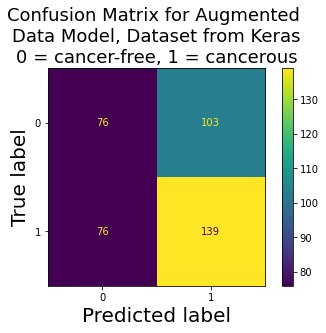

In [380]:
print('0 - cancer free, 1 - cancerous')
matrix1 = ConfusionMatrixDisplay(confusion_matrix=confusion1)
matrix1.plot() # this is part of sklearn not pyplot
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
plt.title("Confusion Matrix for Augmented \nData Model, Dataset from Keras\n0 = cancer-free, 1 = cancerous", size=18)

In [ ]:
# ypred1 ^^^ confusion1 above = WITH daga augmentation
# you can see FP and FN

In [191]:
# now to view data augmented model not directly loaded from keras
# y_pred1_check as ypred
new_ypred1_check = []
for item in y_pred1_check:
    newitem = (item > 0.5)
    print(newitem)
    new_ypred1_check.append(newitem)
print(new_ypred1_check)

[False False  True False]
[False False  True False]
[False False  True False]
[False False False  True]
[False  True False False]
[False False False  True]
[ True False False False]
[False  True False False]
[ True False False False]
[False  True False False]
[False False  True False]
[False False  True False]
[False  True False False]
[False False  True False]
[False  True False False]
[ True False False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False False  True False]
[ True False False False]
[ True False False False]
[False  True False False]
[False False  True False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False  True False False]
[False False  True False]
[False  True False False]
[ True False False False]
[False  True False False]
[False  True False False]
[False  True

In [193]:
check_yp_out = []
for item in new_ypred1_check:
    if item[0] == 1.0 or item[1] == 1.0:
        check_yp_out.append(1)
    else:
        check_yp_out.append(0)

In [307]:
confusion2 = confusion_matrix(binary_ytest, check_yp_out)
confusion2

array([[ 80,  99],
       [ 72, 143]], dtype=int64)

Text(0.5, 1.0, 'Augmented model, not directly \nloaded from Keras (best results)\n0 = cancer-free, 1 = cancerous')

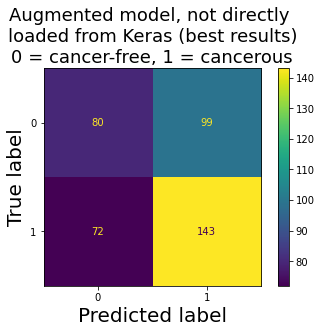

In [379]:
matrix2 = ConfusionMatrixDisplay(confusion_matrix=confusion2)
matrix2.plot() # this is part of sklearn not pyplot
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
plt.title('Augmented model, not directly \nloaded from Keras (best results)\n0 = cancer-free, 1 = cancerous', size=18)

In [334]:
#find_folder = str(os.getcwd())

In [170]:
model_dir = find_folder + '/myModelDenseNet2'
os.listdir(model_dir)

['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']

In [171]:
# load model that does not augment data
un_aug_model = tf.keras.models.load_model(model_dir)
un_aug_model

In [172]:
# *************************
# added by me, add to colab
# *************************
y_pred2 = un_aug_model.predict(X_test)
y_pred2

array([[1.04498153e-03, 1.63619106e-07, 1.32300841e-06, 9.98953581e-01],
       [1.59339549e-03, 3.49326074e-05, 7.97110715e-06, 9.98363674e-01],
       [9.94779110e-01, 1.08821681e-04, 1.35185655e-05, 5.09861391e-03],
       ...,
       [5.15638094e-05, 7.75008448e-05, 1.64802227e-10, 9.99870896e-01],
       [5.76388493e-06, 2.64813571e-06, 6.21635436e-08, 9.99991536e-01],
       [5.85230410e-01, 1.18016328e-06, 4.11299676e-01, 3.46870814e-03]],
      dtype=float32)

In [176]:
# convert to binary class - cancerous or cancer free
new_ypred2 = []
for item in y_pred2:
    newitem = (item > 0.5)
    print(newitem)
    new_ypred2.append(newitem)
new_ypred2

[False False False  True]
[False False False  True]
[ True False False False]
[ True False False False]
[False False False  True]
[ True False False False]
[False False False  True]
[False False  True False]
[False False False  True]
[ True False False False]
[ True False False False]
[False False  True False]
[ True False False False]
[ True False False False]
[ True False False False]
[False False False  True]
[False False False  True]
[ True False False False]
[ True False False False]
[ True False False False]
[False False  True False]
[False False False  True]
[False False False  True]
[ True False False False]
[False False  True False]
[ True False False False]
[ True False False False]
[False  True False False]
[ True False False False]
[False False False  True]
[False False False  True]
[ True False False False]
[ True False False False]
[False False False  True]
[ True False False False]
[False False  True False]
[False False False  True]
[ True False False False]
[False False

[array([False, False, False,  True]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([False, False,  True, False]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False,  True, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False,  True, False]),
 array([False, False, False,  True]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([False, False,  True, False]),
 array([ True, False, False, False]),
 array([ Tru

In [173]:
y_pred2_ = un_aug_model.predict(set_)
y_pred2_

array([[9.6214870e-05, 2.0944730e-04, 4.7086918e-10, 9.9969435e-01],
       [9.9159652e-01, 2.1454347e-09, 3.7185555e-06, 8.3998023e-03],
       [9.9938333e-01, 1.5517743e-11, 9.7605135e-10, 6.1663974e-04],
       ...,
       [1.1843038e-05, 1.3230945e-08, 7.5629968e-11, 9.9998820e-01],
       [3.3171591e-01, 1.2632791e-05, 1.4520473e-04, 6.6812623e-01],
       [1.7593542e-06, 6.1304646e-09, 9.9955457e-01, 4.4361796e-04]],
      dtype=float32)

In [177]:
# convert to binary class - cancerous or cancer free
new_ypred2_ = []
for item in y_pred2_:
    newitem = (item > 0.5)
    print(newitem)
    new_ypred2_.append(newitem)
new_ypred2_

[False False False  True]
[ True False False False]
[ True False False False]
[False False False False]
[False  True False False]
[ True False False False]
[ True False False False]
[False False False  True]
[ True False False False]
[False False False  True]
[False False False  True]
[ True False False False]
[ True False False False]
[False False  True False]
[ True False False False]
[False False False  True]
[False False False  True]
[ True False False False]
[False False False  True]
[False False False False]
[ True False False False]
[ True False False False]
[False False  True False]
[False False False  True]
[ True False False False]
[ True False False False]
[ True False False False]
[False False  True False]
[False  True False False]
[ True False False False]
[ True False False False]
[ True False False False]
[False False False  True]
[ True False False False]
[False  True False False]
[False False  True False]
[False False False  True]
[False False False  True]
[ True False

[array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False, False, False]),
 array([False,  True, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False,  True, False]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([False, False, False,  True]),
 array([False, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([False, False,  True, False]),
 array([False, False, False,  True]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ Tru

In [180]:
y_2_pred_trans1 = [] 
y_2_pred_trans2 = []
# 1 = cancerous
# 0 = cancer-free
for item in new_ypred2:
    if item[0] == 1.0 or item[1] == 1.0:
        y_2_pred_trans1.append(1)
    else:
        y_2_pred_trans1.append(0)
        
for item in new_ypred2_:
    if item[0] == 1.0 or item[1] == 1.0:
        y_2_pred_trans2.append(1)
    else:
        y_2_pred_trans2.append(0)

In [185]:
confusion3 = confusion_matrix(binary_ytest, y_2_pred_trans1)
confusion3

array([[ 99,  80],
       [110, 105]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for unaugmented model,\ndirectly loaded from Keras\n0 = cancer-free, 1 = cancerous')

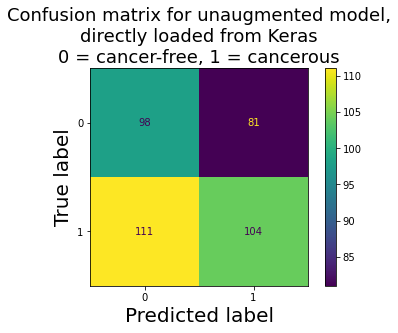

In [377]:
matrix3 = ConfusionMatrixDisplay(confusion_matrix=confusion3)
matrix3.plot() # this is part of sklearn not pyplot
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
plt.title('Confusion matrix for unaugmented model,\ndirectly loaded from Keras\n0 = cancer-free, 1 = cancerous', size=18)

In [188]:
confusion4 = confusion_matrix(binary_ytest, y_2_pred_trans2)
confusion4

array([[ 98,  81],
       [111, 104]], dtype=int64)

Text(0.5, 1.0, 'Unaugmented and indirectly \nloaded from Keras object\n0 = cancer-free, 1 = cancerous')

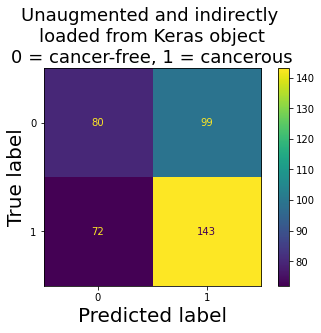

In [378]:
matrix4 = ConfusionMatrixDisplay(confusion_matrix=confusion4)
matrix4.plot() # this is part of sklearn not pyplot
plt.xlabel('Predicted label', size=20)
plt.ylabel('True label', size=20)
plt.title('Unaugmented and indirectly \nloaded from Keras object\n0 = cancer-free, 1 = cancerous', size=18)

In [321]:
# problem ran into: keras did not allow me to save the x test information
# had to try a couple different ways to get decent metrics

print("First demonstration metrics:")
print('Accuracy: {}'.format(accuracy_score(binary_ytest, binary_pred_aug)))
print('Precision: {}'.format(precision_score(binary_ytest, binary_pred_aug)))
print('Recall: {}'.format(recall_score(binary_ytest, binary_pred_aug)))
print('F1 Score: {}'.format(f1_score(binary_ytest, binary_pred_aug)))

First demonstration metrics:
Accuracy: 0.5456852791878173
Precision: 0.5743801652892562
Recall: 0.6465116279069767
F1 Score: 0.6083150984682713


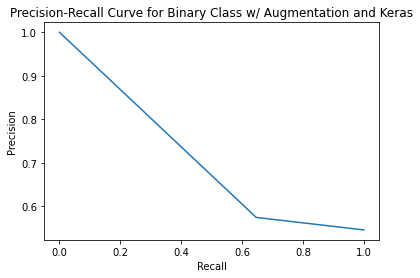

In [343]:
precision1, recall1, thresholds1 = precision_recall_curve(binary_ytest, binary_pred_aug)

fig, ax = plt.subplots()
ax.plot(recall1, precision1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Binary Class w/ Augmentation and Keras')
plt.show()

In [203]:
# this one seemed alright...
print("Second demonstration metrics:")
print('Accuracy: {}'.format(accuracy_score(binary_ytest, check_yp_out)))
print('Precision: {}'.format(precision_score(binary_ytest, check_yp_out)))
print('Recall: {}'.format(recall_score(binary_ytest, check_yp_out)))
print('F1 Score: {}'.format(f1_score(binary_ytest, check_yp_out)))

Second demonstration metrics:
Accuracy: 0.565989847715736
Precision: 0.5909090909090909
Recall: 0.6651162790697674
F1 Score: 0.62582056892779


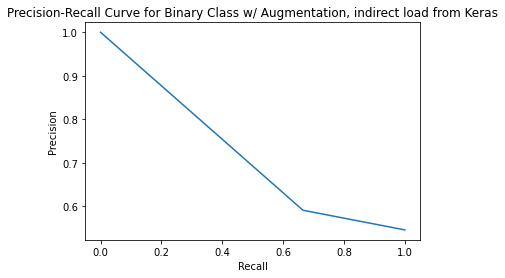

In [344]:
precision2, recall2, thresholds2 = precision_recall_curve(binary_ytest, check_yp_out)

fig, ax = plt.subplots()
ax.plot(recall2, precision2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Binary Class w/ Augmentation, indirect load from Keras')
plt.show()

In [204]:
print("Third demonstration metrics:")
print('Accuracy: {}'.format(accuracy_score(binary_ytest, y_2_pred_trans1)))
print('Precision: {}'.format(precision_score(binary_ytest, y_2_pred_trans1)))
print('Recall: {}'.format(recall_score(binary_ytest, y_2_pred_trans1)))
print('F1 Score: {}'.format(f1_score(binary_ytest, y_2_pred_trans1)))

Third demonstration metrics:
Accuracy: 0.5177664974619289
Precision: 0.5675675675675675
Recall: 0.4883720930232558
F1 Score: 0.525


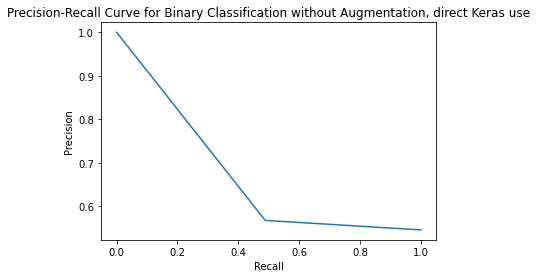

In [345]:
precision3, recall3, thresholds3 = precision_recall_curve(binary_ytest, y_2_pred_trans1)

fig, ax = plt.subplots()
ax.plot(recall3, precision3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Binary Classification without Augmentation, direct Keras use')
plt.show()

In [205]:
print("Fourth demonstrartion metrics:")
print('Accuracy: {}'.format(accuracy_score(binary_ytest, y_2_pred_trans2)))
print('Precision: {}'.format(precision_score(binary_ytest, y_2_pred_trans2)))
print('Recall: {}'.format(recall_score(binary_ytest, y_2_pred_trans2)))
print('F1 Score: {}'.format(f1_score(binary_ytest, y_2_pred_trans2)))

Fourth demonstrartion metrics:
Accuracy: 0.5126903553299492
Precision: 0.5621621621621622
Recall: 0.48372093023255813
F1 Score: 0.52


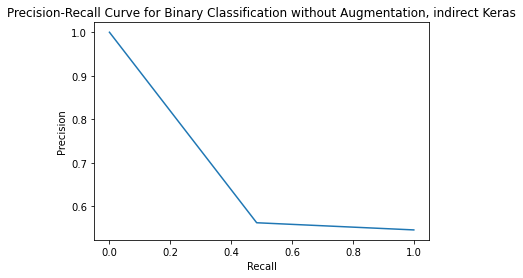

In [346]:
precision4, recall4, thresholds4 = precision_recall_curve(binary_ytest, y_2_pred_trans2)

fig, ax = plt.subplots()
ax.plot(recall4, precision4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Binary Classification without Augmentation, indirect Keras')
plt.show()

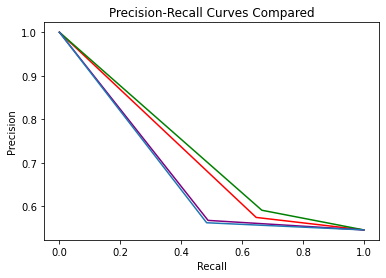

In [347]:
fig, ax = plt.subplots()
ax.plot(recall1, precision1, color='red')
ax.plot(recall2, precision2, color='green')
ax.plot(recall3, precision3, color='purple')
ax.plot(recall4, precision4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Compared')
plt.show()

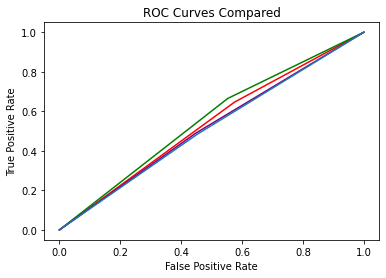

In [350]:
fpr, tpr, _ = roc_curve(binary_ytest,  binary_pred_aug)
fpr1, tpr1, _ = roc_curve(binary_ytest,  check_yp_out)
fpr2, tpr2, _ = roc_curve(binary_ytest,  y_2_pred_trans1)
fpr3, tpr3, _ = roc_curve(binary_ytest,  y_2_pred_trans2)

#create ROC curve
plt.plot(fpr,tpr, color='red')
plt.plot(fpr1, tpr1, color='green')
plt.plot(fpr2,tpr2,color='purple')
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves Compared')
plt.show()

In [ ]:
# maybe print some images with outcomes

Text(0.5, 1.0, 'Actual max values resulting from model\nAugmented and loaded from Keras')

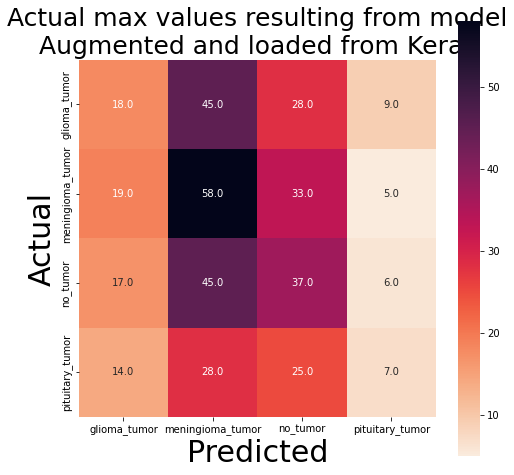

In [366]:
# not binary
y_pred_ish = np.argmax(y_pred1, axis=1)
y_true_ish = np.argmax(y_test, axis=1)

cm1 = confusion_matrix(y_true_ish, y_pred_ish)
plt.figure(figsize=(8, 8))
ax = sb.heatmap(cm1, cmap="rocket_r", fmt=".01f",annot_kws={'size':10}, annot=True, square=True, xticklabels=class_labels, yticklabels=class_labels)
ax.set_ylabel('Actual', fontsize=30)
ax.set_xlabel('Predicted', fontsize=30)
plt.title('Actual max values resulting from model\nAugmented and loaded from Keras', size=25)

Text(0.5, 1.0, 'Actual max values resulting from model\nAugmented and indirectly loaded from Keras')

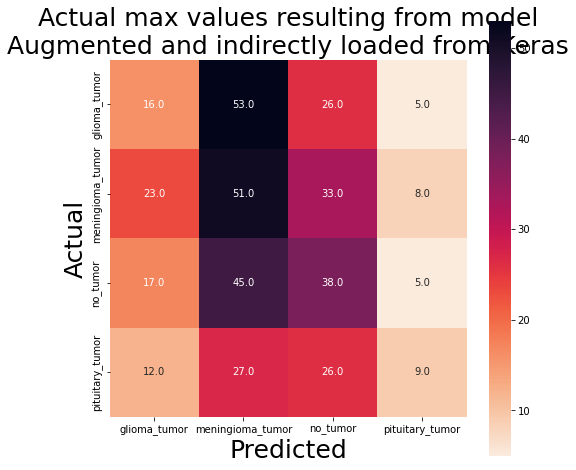

In [365]:
# not binary
y_pred_adv = np.argmax(y_pred1_check, axis=1)
y_true_adv = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_adv, y_pred_adv)
plt.figure(figsize=(8, 8))
ax = sb.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':10}, annot=True, square=True, xticklabels=class_labels, yticklabels=class_labels)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)
plt.title('Actual max values resulting from model\nAugmented and indirectly loaded from Keras', size=25)